<a href="https://colab.research.google.com/github/ProboKrishnacahya/Machine_Learning/blob/main/Week7_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0706012010039 - Probo Krishnacahya
**IMT01306601-A Machine Learning**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exercise 1 Iris Datasets
Gunakan dataset iris pada link berikut https://raw.githubusercontent.com/elflin/datasets/main/Iris.csv </br>
untuk melakukan klasifikasi menggunakna Decision tree

## Load Dataset

In [ ]:
# Load data dari link github berikut
# Munculkan head() dari data
url = "https://raw.githubusercontent.com/elflin/datasets/main/Iris.csv"
data = pd.read_csv(url)
data.drop("Id", axis=1, inplace=True)

data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Munculkan informasi dari column pada data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# Munculkan deskripsi dari masing-masing column pada data
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


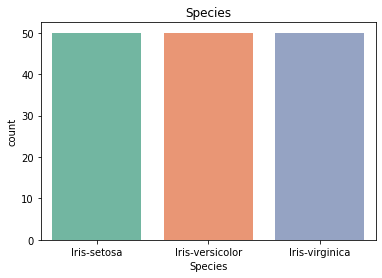

In [ ]:
# Munculkan jumlah data untuk masing-masing class

sns.countplot(x = data["Species"], palette="Set2")
plt.title("Species")
plt.show()

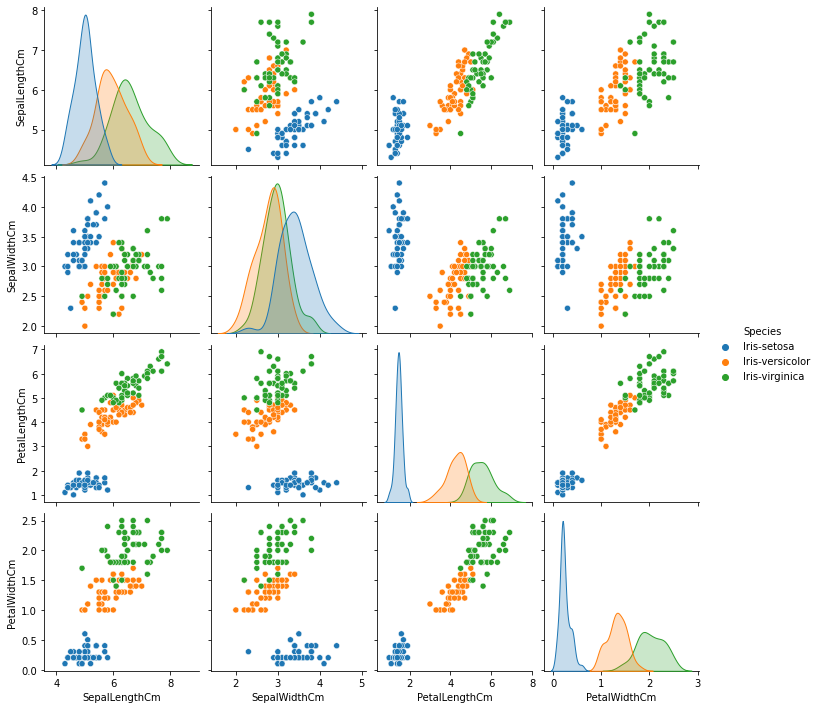

In [ ]:
# Alternatif: Seaborn pairplot untuk memunculkan penyebaran data
sns.pairplot(data=data, hue='Species')
plt.show()

## Pre-procesing Data

In [ ]:
# Pisahkan dataset menjadi x dan y menggunakna loc
X, y = data.loc[:, data.columns != 'Species'], data.loc[:, 'Species']

In [ ]:
# Normalisasi data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_scaled.head()

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [ ]:
# Setelah dataset dibagi menjadi x = atribut dan y = class kemudian dipisahkan menjadi data training dan testing menggunakan train_test_split()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=32)

## Decision tree

In [ ]:
from sklearn import tree
# Buat model menggunakan decision tree
dtree = tree.DecisionTreeClassifier()

# Lakukan training dengan dataset train
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Lakukan prediksi menggunakan x_test lalu print class hasil prediksi
y_pred = dtree.predict(X_test)
print('Prediction', format(y_pred))

Prediction ['Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa']


In [ ]:
# Print akurasi dari data testing menggunakan score
print('DTree Accuracy', format(dtree.score(X_test, y_test)))

DTree Accuracy 1.0


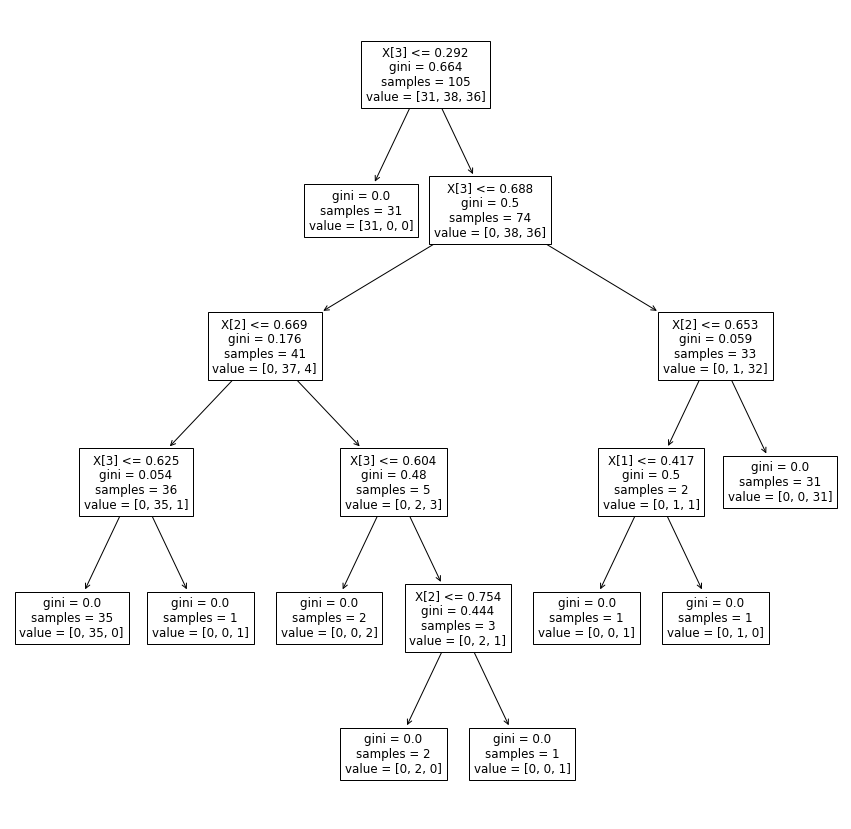

In [ ]:
# tampilkan tree hasil training
plt.figure(figsize=(15,15))
tree.plot_tree(dtree) 
plt.show()

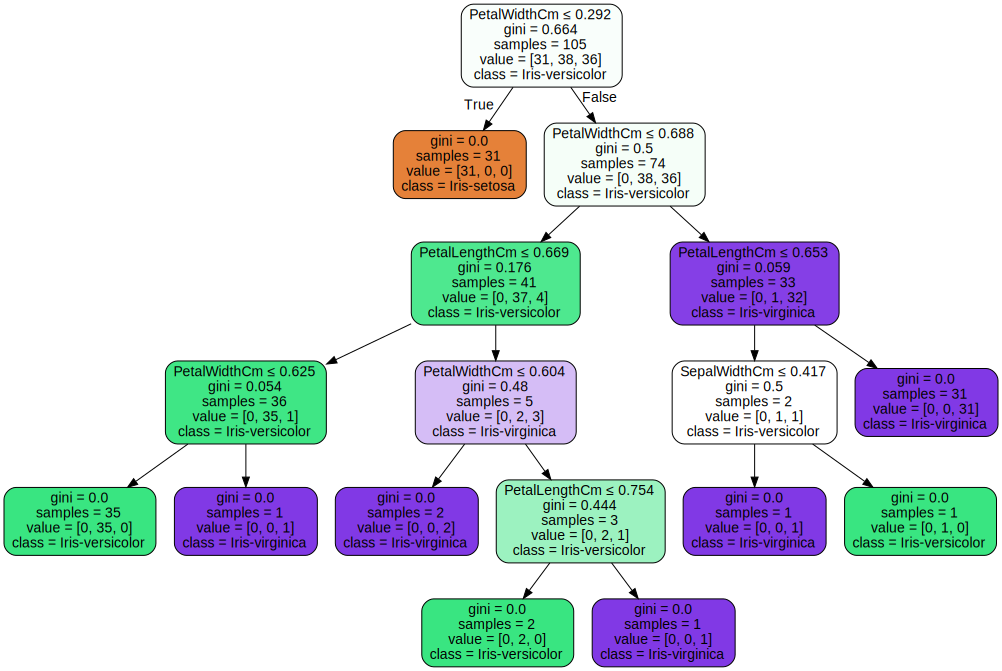

In [ ]:
import graphviz
# alternatif menggunakan lib graphviz untuk menampilkan tree
dot_data = tree.export_graphviz(dtree, out_file=None,
                                feature_names=X.columns.values.tolist(),
                                class_names=y.unique(),
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
from sklearn.metrics import confusion_matrix
# Matriks confusion array using sklearn
cm = confusion_matrix(y_test, y_pred)

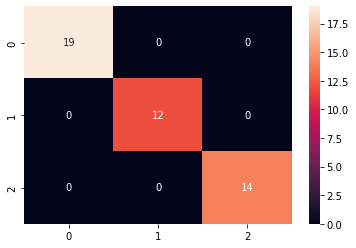

In [ ]:
# Munculkan heatmap dari matriks confusion
sns.heatmap(cm, annot=True)

In [ ]:
# Model Evaluation
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=data.Species.value_counts().index))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        14

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



## Random Forest

In [ ]:
# Buatlah prediksi dengan Random forest
from sklearn.ensemble import RandomForestClassifier

randforest = RandomForestClassifier()

# Lakukan training dengan dataset train
randforest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Lakukan prediksi menggunakan x_test lalu print class hasil prediksi
y_pred = randforest.predict(X_test)
print('Prediction', format(y_pred))

Prediction ['Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa']


In [ ]:
# Print akurasi dari data testing menggunakan score
print('Random Forest Accuracy', format(randforest.score(X_test, y_test)))

Random Forest Accuracy 1.0


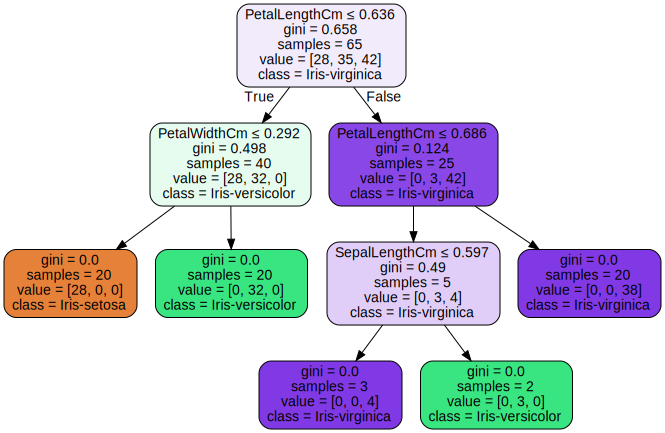

In [ ]:
import graphviz 
# alternatif menggunakan lib graphviz untuk menampilkan Random forest
# random forest terdiri dari banyak tree oleh sebab itu tidak bs dimunculkan semua, untuk memanggil 1 1 maka dapat menggunakan 
# [namarandomforest].estimators_[index]
dot_data = tree.export_graphviz(randforest.estimators_[1], out_file=None, 
                                feature_names=X.columns.values.tolist(),  
                                class_names=y.unique(),  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data) 
graph 

# Exercise 2 Orthopedic Datasets
Gunakan dataset iris pada link berikut https://raw.githubusercontent.com/elflin/datasets/main/orthopedic_3class.csv </br>
untuk melakukan klasifikasi menggunakna Decision tree


## Load Dataset

In [ ]:
# Load data dari link github berikut
# Munculkan head() dari data
url = "https://raw.githubusercontent.com/elflin/datasets/main/orthopedic_3class.csv"
df = pd.read_csv(url)

df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class_status
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [ ]:
# Munculkan informasi dari column pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class_status              310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [ ]:
# Munculkan deskripsi dari masing-masing column pada data
df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [ ]:
# Munculkan jumlah data untuk masing-masing class
df.class_status.value_counts()

Spondylolisthesis    150
Normal               100
Hernia                60
Name: class_status, dtype: int64

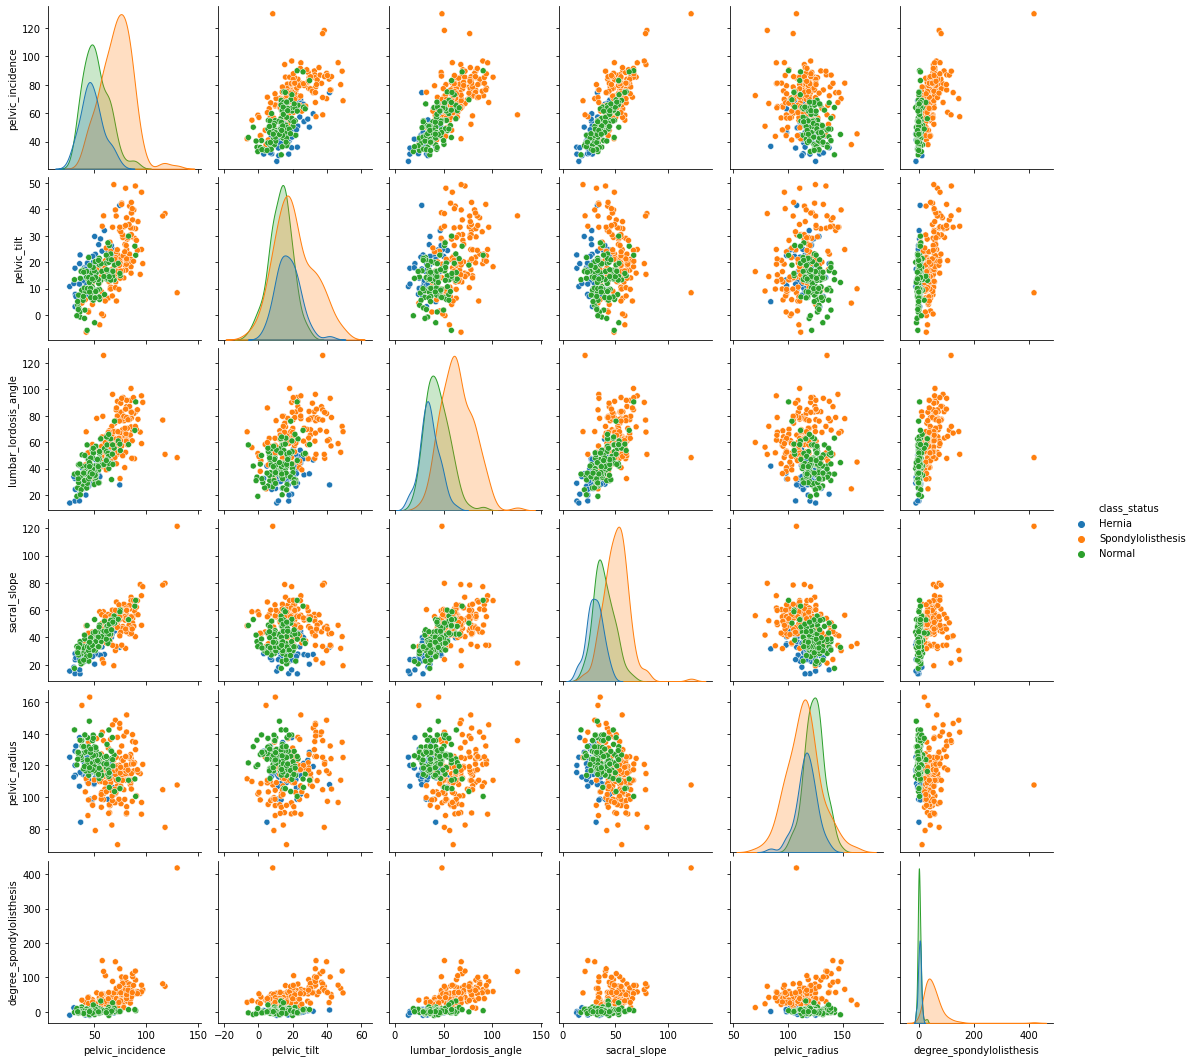

In [ ]:
# Alternatif: Seaborn Pairplot
sns.pairplot(df, hue='class_status')

## Pre-procesing Data

In [ ]:
# Pisahkan dataset menjadi x dan y menggunakna loc
X, y = df.loc[:, df.columns != 'class_status'], df.loc[:, 'class_status']

In [ ]:
# Normalisasi data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))
X_scaled.head()

,0,1,2,3,4,5
0,0.355688,0.519900,0.229180,0.250857,0.307461,0.025148
1,0.124501,0.296783,0.098578,0.144629,0.476649,0.036365
2,0.411666,0.513932,0.322995,0.307661,0.386097,0.017523
3,0.416151,0.557414,0.271260,0.289436,0.341826,0.051838
4,0.227272,0.289479,0.128129,0.247022,0.409579,0.044173


In [ ]:
# Setelah dataset dibagi menjadi x = atribut dan y = class kemudian dipisahkan menjadi data training dan testing menggunakan train_test_split()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=32)

## Decision tree

In [ ]:
from sklearn import tree
# Buat model menggunakan decision tree
dtree = tree.DecisionTreeClassifier()

# Lakukan training dengan dataset train
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Lakukan prediksi menggunakan x_test lalu print class hasil prediksi
y_pred = dtree.predict(X_test)
print('Prediction', format(y_pred))

Prediction ['Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis' 'Normal'
 'Normal' 'Normal' 'Spondylolisthesis' 'Spondylolisthesis' 'Hernia'
 'Spondylolisthesis' 'Spondylolisthesis' 'Hernia' 'Hernia' 'Normal'
 'Spondylolisthesis' 'Spondylolisthesis' 'Normal' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Hernia' 'Normal' 'Normal'
 'Normal' 'Spondylolisthesis' 'Normal' 'Spondylolisthesis' 'Normal'
 'Normal' 'Normal' 'Normal' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis' 'Normal'
 'Spondylolisthesis' 'Spondylolisthesis' 'Hernia' 'Normal'
 'Spondylolisthesis' 'Normal' 'Normal' 'Normal' 'Normal'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Normal' 'Normal' 'Hernia' 'Normal' 'Normal' 'Hernia'
 'Normal' 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Normal' 'Normal' 'Hernia' 'Normal' 'Hernia' 'Normal' 'Hernia' 'Normal'
 'Normal' 'Spondylolisthesis' 'Normal' 'Spon

In [ ]:
# Print akurasi dari data testing menggunakan score
y_pred = dtree.predict(X_test)
print('DTree Accuracy', format(dtree.score(X_test, y_test)))

DTree Accuracy 0.7311827956989247


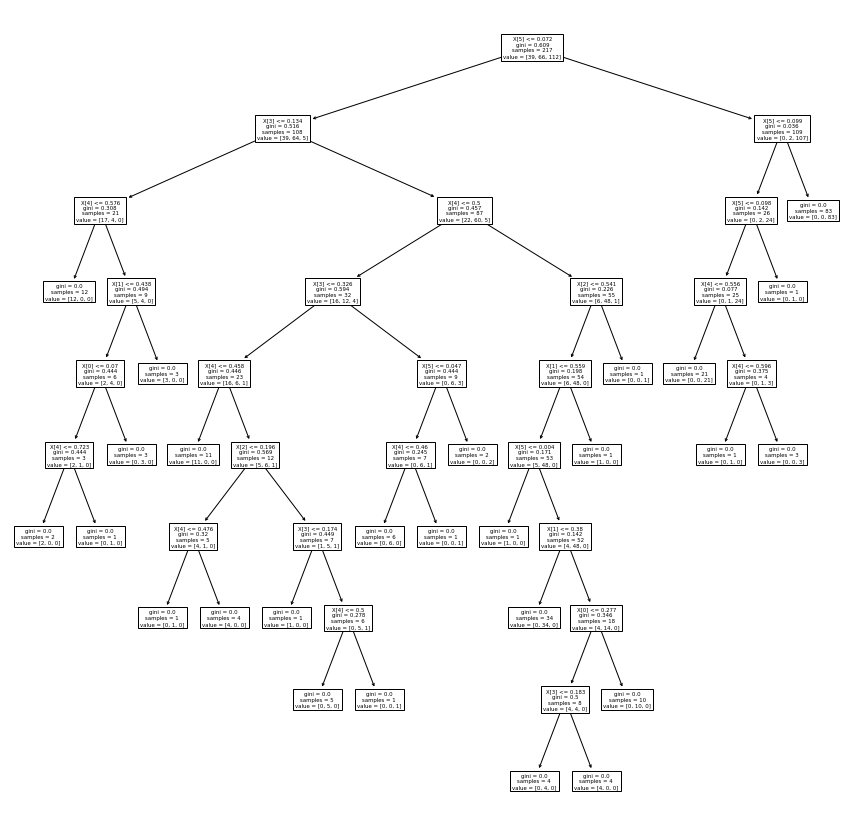

In [ ]:
# tampilkan tree hasil training
plt.figure(figsize=(15,15))
tree.plot_tree(dtree) 
plt.show()

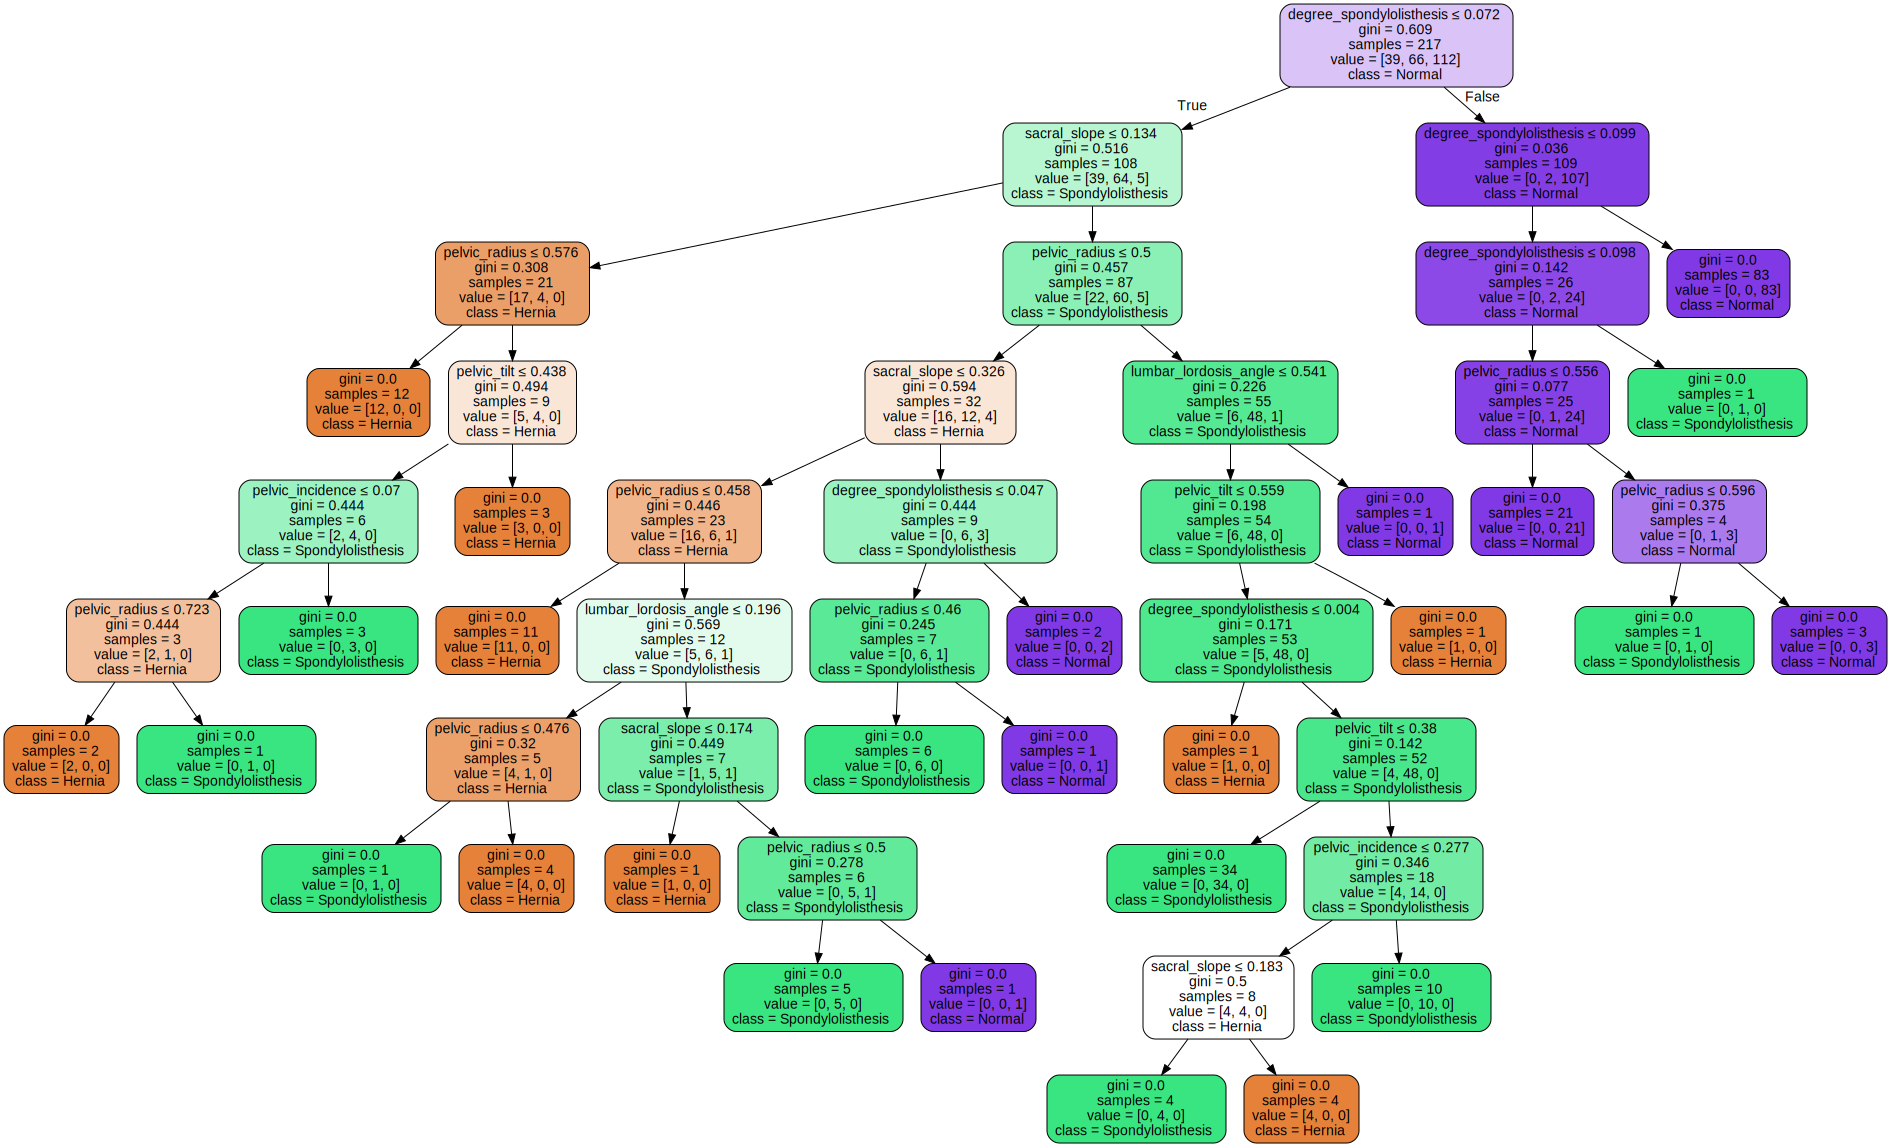

In [ ]:
import graphviz 
# alternatif menggunakan lib graphviz untuk menampilkan tree
dot_data = tree.export_graphviz(dtree, out_file=None,
                                feature_names=X.columns.values.tolist(),
                                class_names=y.unique(),
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
from sklearn.metrics import confusion_matrix
# Matriks confusion array using sklearn
cm = confusion_matrix(y_test, y_pred)

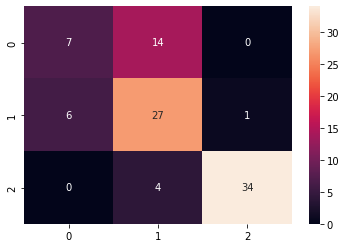

In [ ]:
# Munculkan heatmap dari matriks confusion
sns.heatmap(cm, annot=True)

In [ ]:
# Model Evaluation
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=df.class_status.value_counts().index))

                   precision    recall  f1-score   support

Spondylolisthesis       0.54      0.33      0.41        21
           Normal       0.60      0.79      0.68        34
           Hernia       0.97      0.89      0.93        38

         accuracy                           0.73        93
        macro avg       0.70      0.67      0.68        93
     weighted avg       0.74      0.73      0.72        93



## Random Forest

In [ ]:
# Buatlah prediksi dengan Random forest
from sklearn.ensemble import RandomForestClassifier

randforest = RandomForestClassifier()

# Lakukan training dengan dataset train
randforest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Lakukan prediksi menggunakan x_test lalu print class hasil prediksi
y_pred = randforest.predict(X_test)
print('Prediction', format(y_pred))

Prediction ['Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis' 'Normal'
 'Normal' 'Normal' 'Spondylolisthesis' 'Spondylolisthesis' 'Hernia'
 'Spondylolisthesis' 'Spondylolisthesis' 'Hernia' 'Hernia' 'Normal'
 'Spondylolisthesis' 'Spondylolisthesis' 'Normal' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Hernia' 'Hernia' 'Normal'
 'Normal' 'Spondylolisthesis' 'Normal' 'Spondylolisthesis' 'Hernia'
 'Normal' 'Normal' 'Normal' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis' 'Hernia'
 'Spondylolisthesis' 'Spondylolisthesis' 'Normal' 'Hernia'
 'Spondylolisthesis' 'Normal' 'Normal' 'Spondylolisthesis' 'Hernia'
 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Spondylolisthesis' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Spondylolisthesis' 'Spondylolisthesis' 'Spondylolisthesis'
 'Normal' 'Normal' 'Hernia' 'Normal' 'Hernia' 'Normal' 'Hernia'
 'Spondylolisthesis' 'Normal' 'Normal' 'No

In [ ]:
# Print akurasi dari data testing menggunakan score
print('Random Forest Accuracy', format(randforest.score(X_test, y_test)))

Random Forest Accuracy 0.8064516129032258


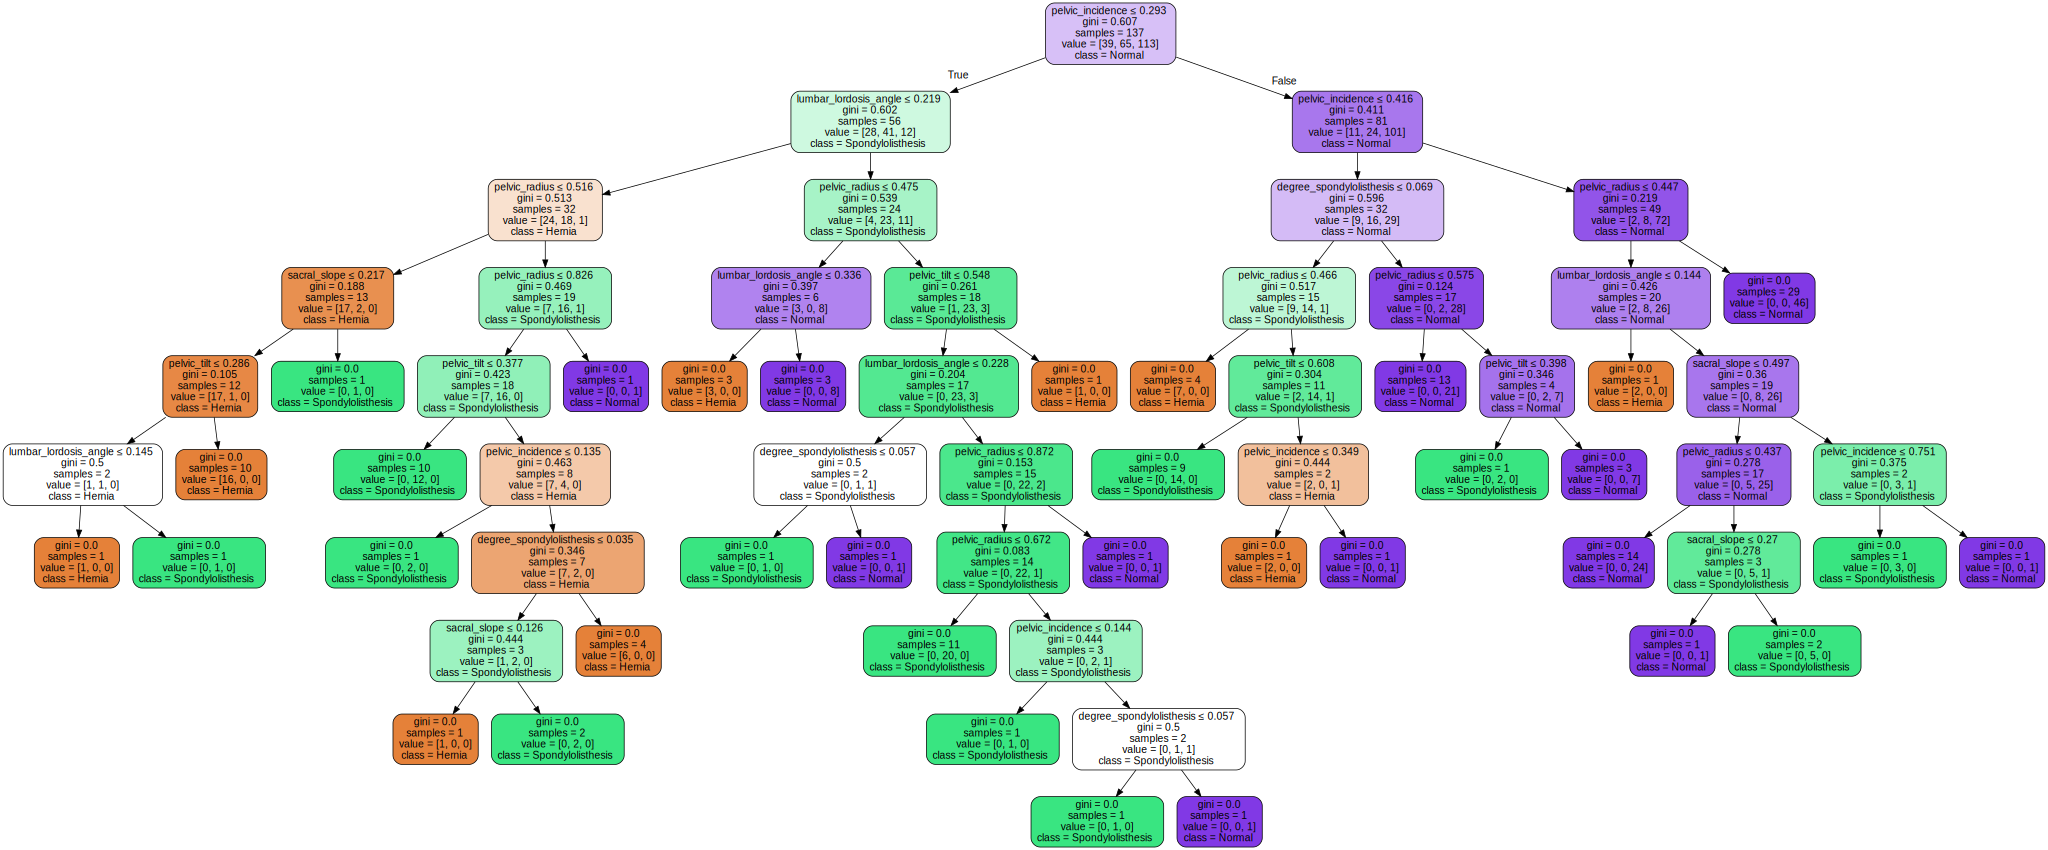

In [ ]:
import graphviz 
# alternatif menggunakan lib graphviz untuk menampilkan Random forest
# random forest terdiri dari banyak tree oleh sebab itu tidak bs dimunculkan semua, untuk memanggil 1 1 maka dapat menggunakan 
# [namarandomforest].estimators_[index]
dot_data = tree.export_graphviz(randforest.estimators_[1], out_file=None, 
                                feature_names=X.columns.values.tolist(),  
                                class_names=y.unique(),  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data) 
graph 